## Exploratory Data Analysis
Let's start with importing all the required libraries for the analysis.

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import re
#style.use('fivethirtyeight')
sns.set(style='whitegrid')
#sns.set(style='fivethirtyeight')

Importing the Loan Dataset

In [119]:
loan = pd.read_csv(r"C:\Users\Nivass\Downloads\Upgrad\Case Study\loan.csv",encoding = "ISO-8859-1", low_memory=False)

Data Understanding

In [120]:
loan.shape

(39717, 111)

In [121]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [122]:
#Looking at he inital 5 rows of dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

In [123]:
loan.isnull().mean() * 100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [124]:
#percentage of null value in data set
loan.isnull().sum().sum()/len(loan)

56.987285041669814

we drop all columns with 100% null values

In [125]:
missing = loan.isnull().mean() * 100
missing

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [126]:
columns_with_missing_values = list(missing[missing == 100].index)
len(columns_with_missing_values)

54

In [127]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 57)

We are now down with 57 columns from 111 columns

In [128]:
#we delete columns above 50% null values
missing = round(100*(loan.isnull().sum()/len(loan)), 2)
x = list(missing[missing > 50].index)
loan = loan.drop(x,axis=1)
loan.shape

(39717, 54)

In [129]:
missing = round(100*(loan.isnull().sum()/len(loan)), 2)
missing.loc[missing > 10]

desc    32.58
dtype: float64

In [130]:
#we can see that the desc column have 32% of null values , we can drop that no
loan = loan.drop(['desc'],axis=1)
loan.shape

(39717, 53)

In [131]:
# again check for null values
missing = round(100*(loan.isnull().sum()/len(loan)), 2)
missing.loc[missing != 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [132]:
#Now we check only one unique values in dataset and drop those columns
uni = loan.nunique()
uni_ones = list(uni[uni.values == 1].index)
loan = loan.drop(uni_ones,axis=1)
loan.shape

(39717, 44)

## Now from business point of view we only consider the following columns for further analysis delete the rest from data set

emp_title
emp_length
home_ownership
annual_inc
verification_status
addr_state
purpose
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
loan_status
grade
sub_grade
dti
issue_d
term
installment

In [133]:
column_list = ['emp_title ',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'addr_state',
'purpose',
'loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'int_rate',
'loan_status',
'grade',
'sub_grade',
'dti',
'issue_d',
'term',
'installment'
];

column_removal_list = [x for x in loan.columns if x not in column_list]
#column_removal_list
for col in column_removal_list:
    loan = loan.drop(col, axis=1)

In [134]:
loan.shape

(39717, 17)

In [135]:
#we are down with 17 columns and now lets a look at head of the data set

In [136]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


## standardization of Data set

In [137]:
#removing the % symbol in int_rate

loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [138]:
# removing the years and other symbols in emp_length

loan = loan[~loan['emp_length'].isnull()]
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [139]:
#removing the months in term 
loan['term'] = loan.term.apply(lambda x : x.split()[0])

In [140]:
# lets look at the data set
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


## Derived Metrics

In [141]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')

loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

In [142]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_d_month,issue_d_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,12,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,12,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,12,2011
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,12,2011


In [143]:
# now lets drop the current in loan status column as we are considering only the charged-off and fully paid applicants

loan = loan[loan.loan_status != 'Current']
loan.shape

(37544, 19)

# Data Analysis 

## Univariate and Segmented Univariate Analysis
lets start by analysing the key column loan_status and make observation about the defaulters 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

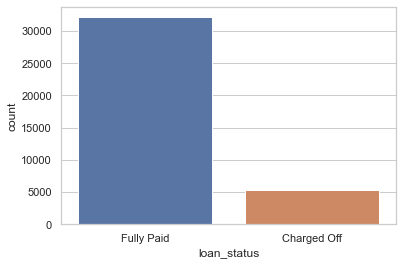

In [144]:
sns.countplot(x = 'loan_status', data = loan)

Now , lets find out the percentage of defaulters and fuly paid applicants in the dataset

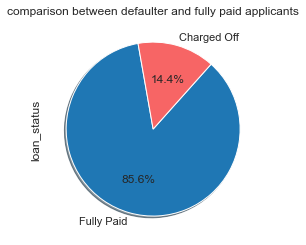

In [145]:
colors = ["#1f77b4", "#f76565"]
explode = (0.1, 0, 0, 0, 0)  
loan['loan_status'].value_counts().plot.pie(colors=colors,
autopct='%1.1f%%', shadow=True, startangle=100)
plt.title("comparison between defaulter and fully paid applicants")
plt.show()

observation: 14.4% which is approximately 14 percent of defaulters in the data set and most of the loans are paid

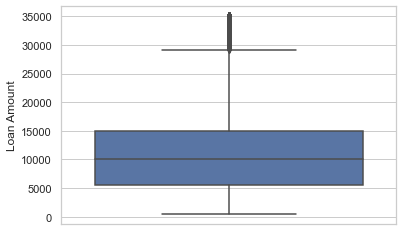

In [146]:
sns.boxplot( y=loan["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

observation: The loan amount varies from 0 to 35,000 having mean of 10,000

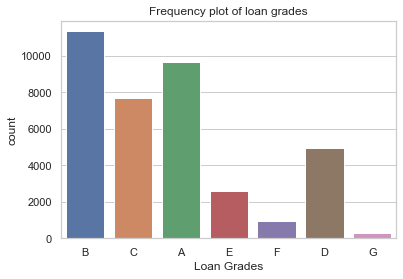

In [147]:
fig, ax = plt.subplots()
sns.countplot(x='grade', data=loan)
plt.title("Frequency plot of loan grades")
plt.xlabel('Loan Grades')
plt.show()

observation: Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

C:\Users\Nivass\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nivass\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


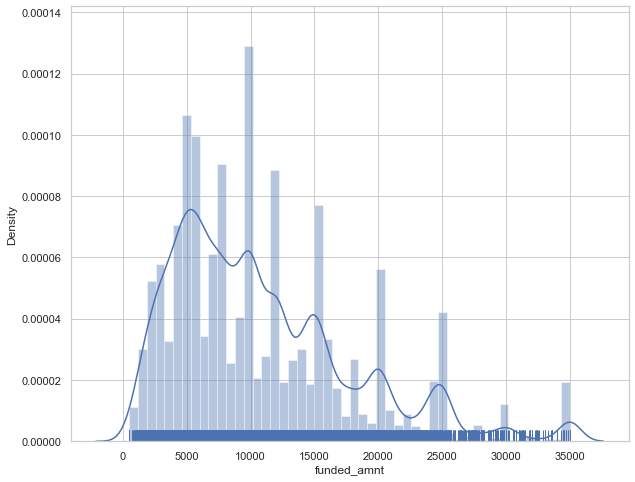

In [148]:
#Increasing the figure size of plot
plt.figure(figsize=(10,8))
sns.distplot(a=loan.funded_amnt, rug=True)
plt.show()

observation: Funded amount is left skewed. Most of the loan amount given is 5 lakhs

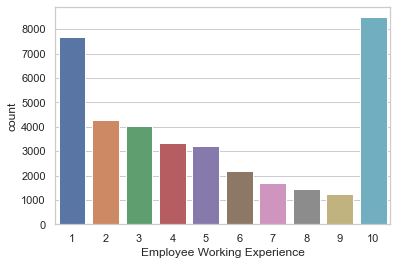

In [149]:
sns.countplot(x='emp_length', data=loan)
plt.xlabel('Employee Working Experience')
plt.show()

observation : Majority of loan applicants have work experience of 10 years and above

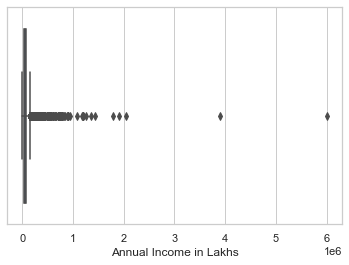

In [150]:
sns.boxplot(x=loan['annual_inc'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

observation: There are only two applicants having annual income of more than 30 lakhs and majority is below 10 lakhs

loan_status  charged_off_percentage  fully_paid_percentage
term                                                      
36                            10.86                  89.14
60                            25.13                  74.87


<AxesSubplot:title={'center':'Term versus Loan Status'}, xlabel='term'>

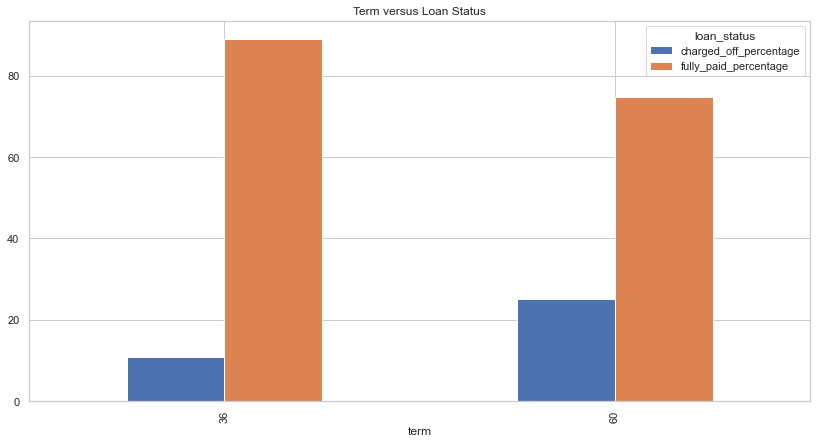

In [151]:
loan_crosstab = pd.crosstab(loan['term'], loan['loan_status'])
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(loan_crosstab)

loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Term versus Loan Status')

Observation : 60 term months has majority of defaulters

In [152]:
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [153]:
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=loan)
    plt.show()

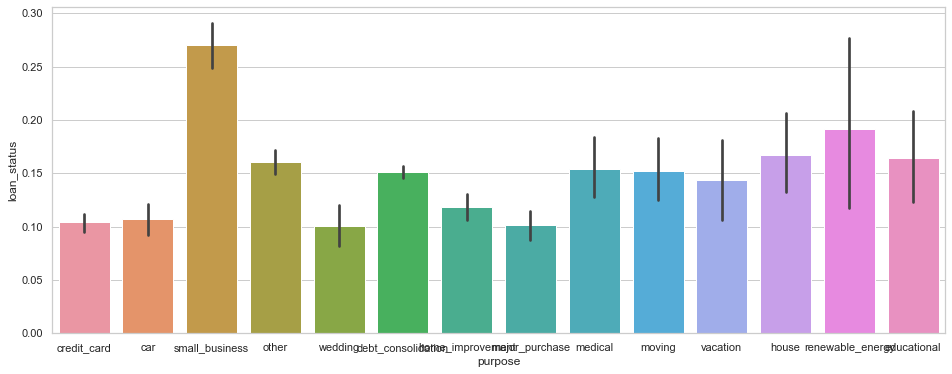

In [154]:
plt.figure(figsize=(16, 6))
plot_cat('purpose')

observation : majority of default loans are for small business > renewable_energy > educational

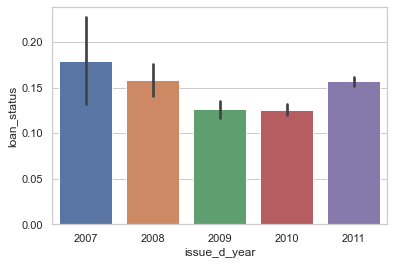

In [155]:
plot_cat('issue_d_year')

observation : after the gradual decrease from 2008 , 2011 has spiked for loans

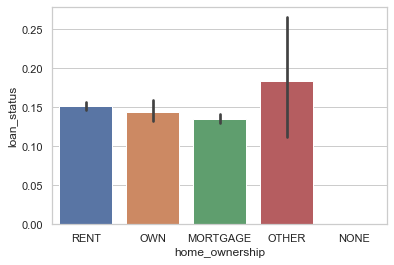

In [156]:
plot_cat('home_ownership')

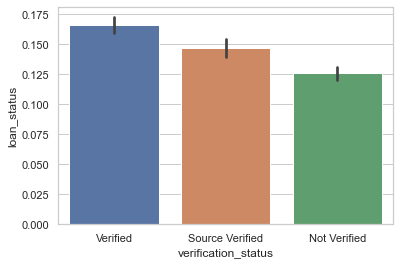

In [157]:
plot_cat('verification_status')

Observation : suprisingly verified loans has more defaulters

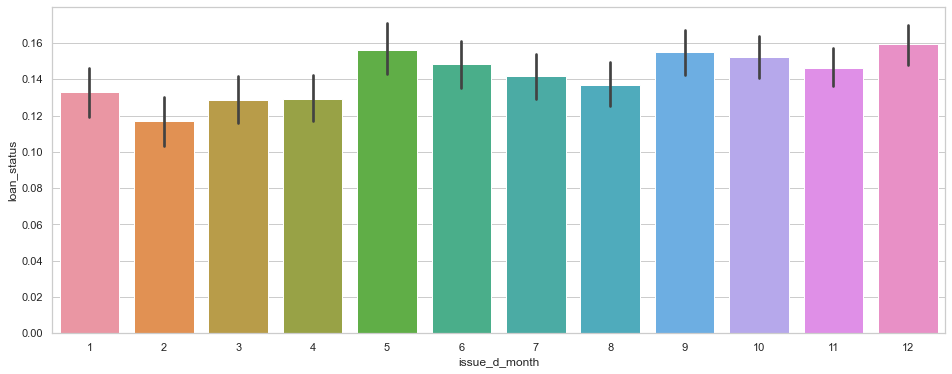

In [158]:
plt.figure(figsize=(16, 6))
plot_cat('issue_d_month')

observation : not much variations in months

# Segmented Univariate Analysis

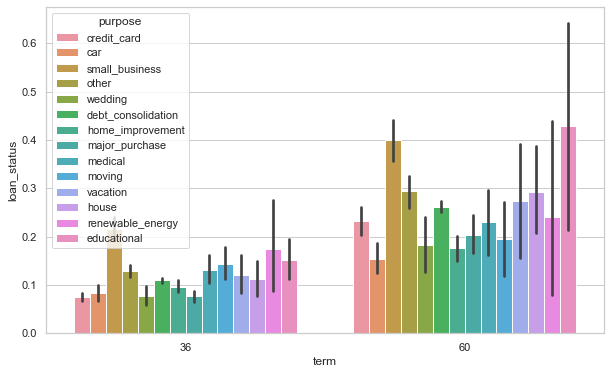

In [159]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan)
plt.show()

In [160]:
# Lets conside the top 4 purposes for better visualization

main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan = loan[loan['purpose'].isin(main_purposes)]
loan['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

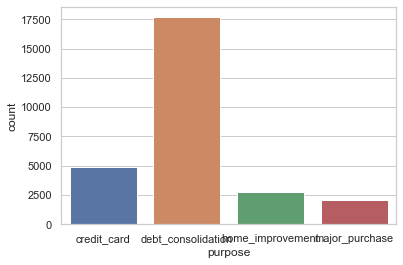

In [161]:
sns.countplot(x=loan['purpose'])
plt.show()

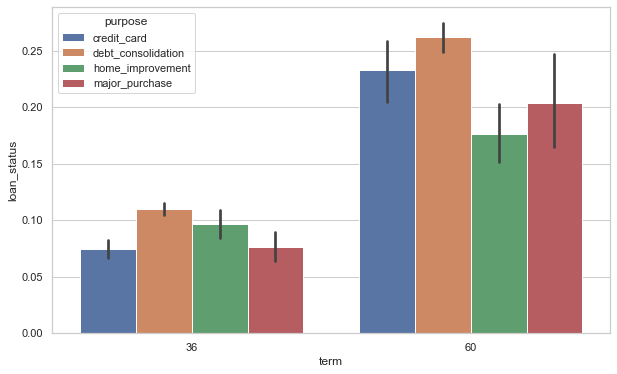

In [162]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan)
plt.show()

observation : we can clearly see the dafaulter are high in 60 months term and debit consolidation and credit are top most                     purposes

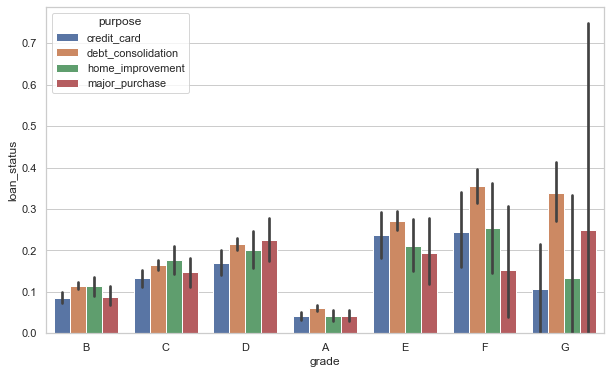

In [163]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=loan)
    plt.show()

    
plot_segmented('grade')

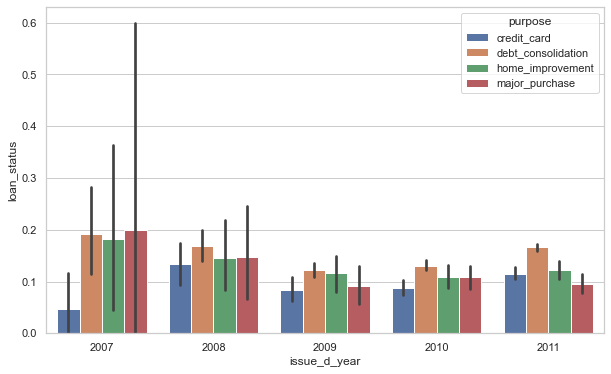

In [164]:
plot_segmented('issue_d_year')

In [165]:
# lets segement the loan amount as high ,medium and low

def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_amount(x))

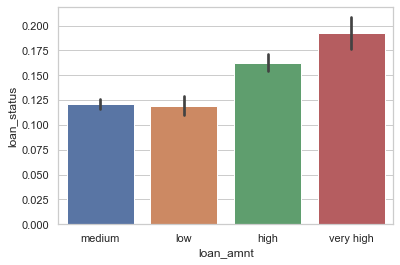

In [166]:
plot_cat('loan_amnt')

observation : higher the loan amount, higher the default rate

In [168]:
#converting same like loan amount

loan['funded_amnt_inv'] = loan['funded_amnt_inv'].apply(lambda x: loan_amount(x))

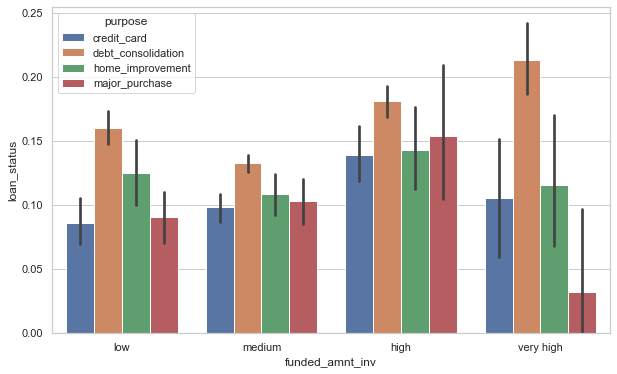

In [187]:
plot_segmented('funded_amnt_inv')

Similar to loan amount not much variations

In [179]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti'] = loan['dti'].apply(lambda x: dti(x))

In [181]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
loan['funded_amnt'] = loan['funded_amnt'].apply(lambda x: funded_amount(x))

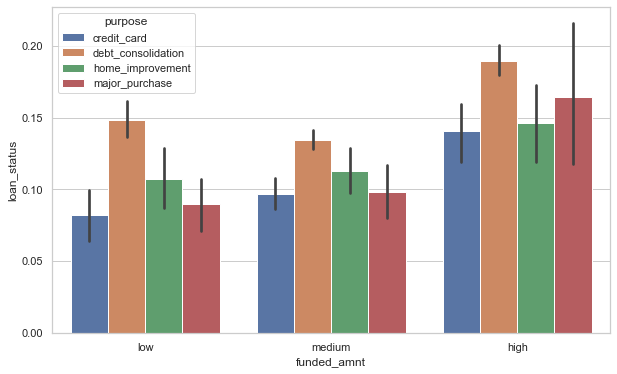

In [186]:
plot_segmented('funded_amnt')

observation : simialr to loan amount variation

In [183]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))

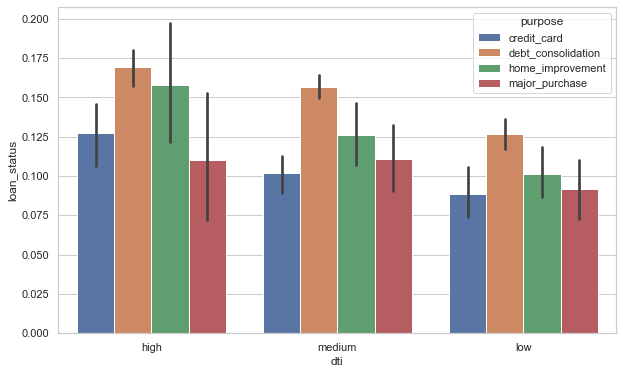

In [185]:
plot_segmented('dti')

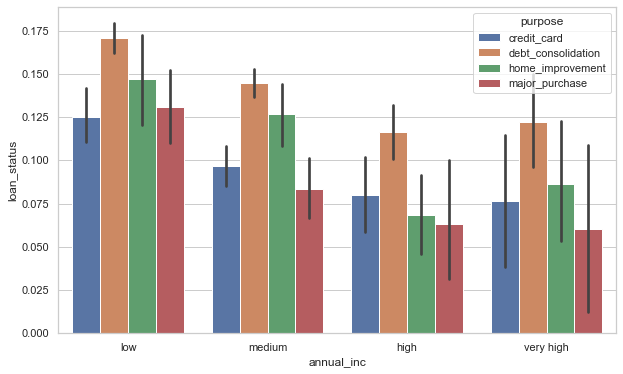

In [188]:
plot_segmented('annual_inc')

# Bivariate Analysis 

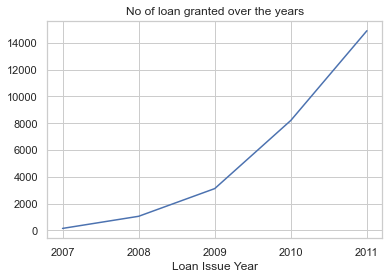

In [199]:
g = loan.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

In [202]:
def Bivariate_Categorical (*, data=loan, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
       
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    if title is not None:
        plt.title(title)
    plt.show()

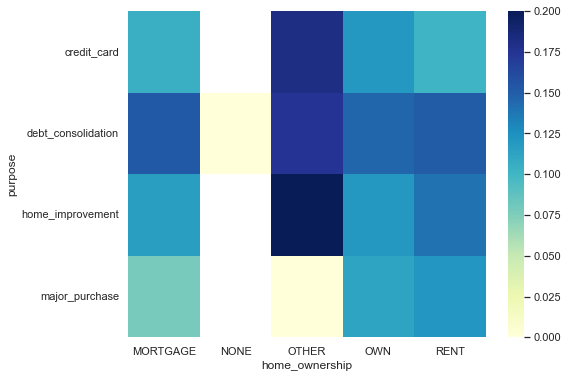

In [203]:
Bivariate_Categorical(x='home_ownership', y='purpose')

the category other has the higher percentage of loan application for for home improvement and credit card

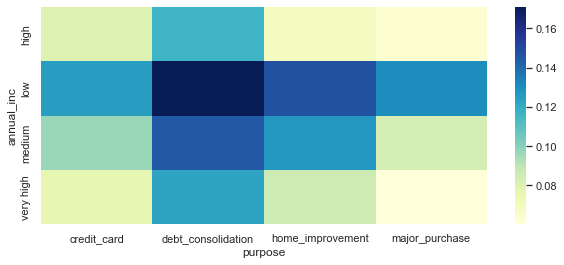

In [204]:
Bivariate_Categorical(x='purpose', y='annual_inc', figsize=(10,4))

the correlation between debt_consolidationa nd low annual income is high

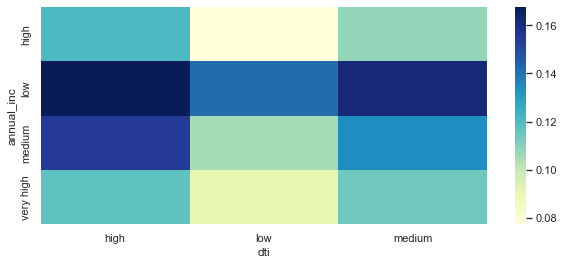

In [207]:
Bivariate_Categorical(x='dti', y='annual_inc', figsize=(10,4))

observation : Medium debt-to-income group in the lowest income range is the most risky when it comes to loan repayment.

# Conclusion

## Major variables to consider for loan prediction:

    1. Loan Purpose
    2. Employment Length
    3. Interest Rate
    4. Annual Income
    5. Grade & Sub-grade
    6. Term

### Loan Purpose:
Charged Off Rate is high for loan purpose:

     small_business   >  renewable_energy > educational
       
            

### Term:

Charge Off Rate high for 60 months term

### Grade:
the Grade increases, Charged Off Rate increases. Top Order:

    1. G
    2. F
    3. E
    4. D
    5. C
    6. B
    7. A

### Employment Length:
Charged Off Rate is high for employment length:

    1.  0 year (< 1 year)
    2.  1 year